# ДЗ Урок 7

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

## Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring

### Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов

Формула парной регрессии 

$y = b_0 + b_1 x$

Коэффиценты формулы

$b_1 = \frac{\sigma_{XY}}{\sigma^2_X}, \:\:
b_0 = \overline{Y} - b_1 \cdot {\overline{X}}$


In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
b1

2.620538882402766

In [4]:
b0 = y.mean() - b1 * x.mean()
b0

444.1773573243595

Формула коэффицента для метода наименьших квадратов

$b = (X^\top X)^{-1} X^\top y$

In [5]:
x_m = x.reshape(-1, 1)
x_m.shape

(10, 1)

In [6]:
ones = np.ones((x_m.shape[0], 1))
x_m = np.hstack((ones, x_m))
x_m.shape

(10, 2)

In [7]:
x_m

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [8]:
y_m = y.reshape(-1, 1)
y_m

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [9]:
XTX = x_m.T.dot(x_m)

np.linalg.det(XTX)

349464.00000000023

In [10]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_m.T).dot(y_m)

print(b)

[[444.17735732]
 [  2.62053888]]


### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

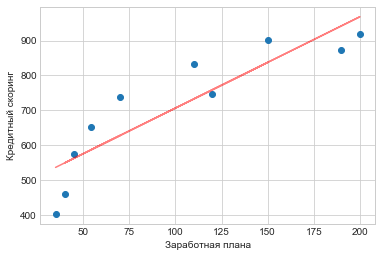

In [11]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Заработная плана')
plt.ylabel('Кредитный скоринг');

### Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [12]:
z = b0 + b1 * x

np.vstack([y, z]).T

array([[401.        , 535.89621821],
       [574.        , 562.10160703],
       [874.        , 942.07974498],
       [919.        , 968.2851338 ],
       [459.        , 548.99891262],
       [739.        , 627.61507909],
       [653.        , 585.68645697],
       [902.        , 837.25818968],
       [746.        , 758.64202321],
       [832.        , 732.43663439]])

Коэффицент детерминации

In [13]:
R = 1 - (z - y).var() / y.var()
R

0.7876386635293685

In [14]:
np.corrcoef(x, y) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Средняя ошибка аппроксимации

In [15]:
mean_approximation_error(y, z)

0.11469251843561709

### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Используемая здесь статистика:
$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)}$

$n = 10$

$k_2 = 10 - 2 = 8$

In [16]:
k1 = 1
k2 = 8

F = (R / k1) / ((1 - R) / k2)
F

29.67164085966449

In [17]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо

### Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [18]:
s_slope = standard_error_slope(x, y, z)
s_slope

0.4810827956851601

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8}$

In [19]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Доверительный интервал для параметра $b_1$:

In [20]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593724, 3.7299177985461593)

Аналогично для параметра $b_0$:

In [21]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

56.46649755068154

Доверительный интервал для параметра $b_0$:

In [22]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816362, 574.3893341670828)

## Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

    выборочное среднее и дисперсию каждой выборки,
    коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они практически не отличаются, постройте scatter plot по каждой паре выборок.

In [23]:
data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

Так как признак один, то для вычисления коэффицентов воспользуемся формулами для Парной регрессии

In [24]:
for i in range(1, 5):
    x = data[f'x{i}']
    y = data[f'y{i}']
    b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
    b0 = np.mean(y) - b1 * np.mean(x)
    print(f'Пара № {i}:\nвыборочное среднее x - {np.mean(x)}, y - {np.mean(y)}')
    print(f'выборочная дисперсия x - {np.var(x)}, y - {np.var(y)}')
    print(f'коэффицент корреляции Пирсона {np.corrcoef(x, y)[0, 1]}')
    print(f'прямая линейной регресиии y = {b0} + {b1} * x')

Пара № 1:
выборочное среднее x - 9.0, y - 7.500909090909093
выборочная дисперсия x - 10.0, y - 3.7520628099173554
коэффицент корреляции Пирсона 0.81642051634484
прямая линейной регресиии y = 3.0000909090909103 + 0.5000909090909091 * x
Пара № 2:
выборочное среднее x - 9.0, y - 7.50090909090909
выборочная дисперсия x - 10.0, y - 3.752390082644628
коэффицент корреляции Пирсона 0.8162365060002427
прямая линейной регресиии y = 3.00090909090909 + 0.5 * x
Пара № 3:
выборочное среднее x - 9.0, y - 7.5
выборочная дисперсия x - 10.0, y - 3.747836363636364
коэффицент корреляции Пирсона 0.8162867394895982
прямая линейной регресиии y = 3.0024545454545457 + 0.4997272727272727 * x
Пара № 4:
выборочное среднее x - 9.0, y - 7.500909090909091
выборочная дисперсия x - 10.0, y - 3.7484082644628103
коэффицент корреляции Пирсона 0.8165214368885028
прямая линейной регресиии y = 3.0017272727272726 + 0.4999090909090909 * x


Построим графики по полученным данным

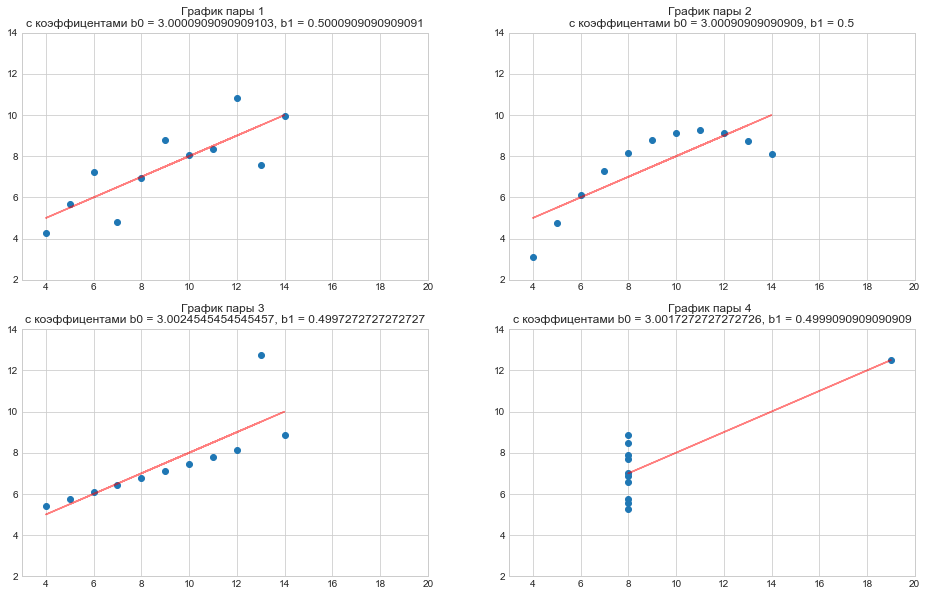

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, ax in enumerate(axes.flat):
    i += 1
    x = data[f'x{i}']
    y = data[f'y{i}']
    b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
    b0 = np.mean(y) - b1 * np.mean(x)
    ox = np.array(x)
    oy = b0 + b1 * ox
    
    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)
    ax.set_title(f'График пары {i} \nс коэффицентами b0 = {b0}, b1 = {b1}')
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)
print()